In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#We are creating really high values so we can show case how its harder for Gradient decent to
np.random.seed(59)
X = np.random.randint(0,1000000,(50000,5))
weights = np.array([-69,4,28,67,74])
bias = 987
y = np.dot(X,weights) + bias


In [4]:
#Checking our data
print(X.shape)
print(X[:5,:])
print(y.shape)
print(y)

(50000, 5)
[[889009 744876 668877 918167 927083]
 [678095 741173 645177 375168 911199]
 [865347 119104 760403 535031  66861]
 [ 33758 415705 696752 787273 229012]
 [286437 998466 368246 334113 857291]]
(50000,)
[ 90488757  66807062   2854535 ...  16161166 115690186  83172750]


In [41]:
class LineraRegression:
  def __init__(self,learning_rate = 0.1,max_iterations=10000):
    self.lr = learning_rate
    self.max_itr = max_iterations
    self.weights = None
    self.bias = None
    self.loss_history = []

  def fit(self,X,y):
    #lets initialize weights first
    n_samples , n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
    for epoch in range(self.max_itr):
      y_pred = self.predict(X)
      error = y_pred - y
      dw = 2/n_samples * np.dot(X.T,error)
      db = 2/n_samples * np.sum(error)
      self.weights = self.weights - self.lr*dw
      self.bias = self.bias -self.lr*db
      loss = np.mean(error**2)
      self.loss_history.append(np.mean(error**2))
      if epoch % 1000 == 0 :
        print(f"Epoch {epoch} , Loss {loss}")
  def predict(self,X):
    return np.dot(X,self.weights) + self.bias
  def plot_loss(self):
        """Helper to visualize convergence"""
        plt.figure(figsize=(8, 5))
        plt.plot(self.loss_history, label='Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss (MSE)')
        plt.title('Loss History')
        plt.legend()
        plt.grid(True)
        plt.show()

In [42]:
model = LineraRegression(learning_rate=0.00001)
model.fit(X,y)

Epoch 0 , Loss 3986933616990935.0


/tmp/ipython-input-3171582255.py:21: RuntimeWarning: overflow encountered in square
  loss = np.mean(error**2)
/tmp/ipython-input-3171582255.py:22: RuntimeWarning: overflow encountered in square
  self.loss_history.append(np.mean(error**2))
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-3171582255.py:19: RuntimeWarning: invalid value encountered in subtract
  self.weights = self.weights - self.lr*dw
/tmp/ipython-input-3171582255.py:20: RuntimeWarning: invalid value encountered in scalar subtract
  self.bias = self.bias -self.lr*db


Epoch 1000 , Loss nan
Epoch 2000 , Loss nan
Epoch 3000 , Loss nan
Epoch 4000 , Loss nan
Epoch 5000 , Loss nan
Epoch 6000 , Loss nan
Epoch 7000 , Loss nan
Epoch 8000 , Loss nan
Epoch 9000 , Loss nan


As you can see our data vales are too high, and python throws as overflow error because our values become too large, there is a solution for this which is Scaling, so now we will scale out data using a StandardScaler method.

In [43]:
class CustomScalar:
  def __init__(self,):
    self.mean = None
    self.std = None

  def fit_transform(self,X):
    self.mean = np.mean(X,axis=0)
    self.std = np.std(X,axis=0)
    return (X-self.mean)/self.std
  def transform(self,X):
    return (X-self.mean)/self.std
  def inverse_transform(self,X):
    return X*self.std + self.mean


In [44]:
scaler = CustomScalar()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [45]:
y_scaled[:5]

array([ 1.07385005,  0.41390836, -1.36826722,  1.01948074,  0.79177677])

In [46]:
X_scaled[:5]

array([[ 1.35651625,  0.84745065,  0.58474295,  1.45888068,  1.48389148],
       [ 0.62587627,  0.83466261,  0.50258458, -0.42385395,  1.42879815],
       [ 1.27454728, -1.31360603,  0.90202676,  0.13043732, -1.49977121],
       [-1.60621063, -0.28931672,  0.68137436,  1.00503331, -0.93735373],
       [-0.73088997,  1.72320469, -0.45742376, -0.56620351,  1.24181934]])

In [47]:
model = LineraRegression(learning_rate=0.1)
model.fit(X_scaled,y_scaled)

Epoch 0 , Loss 0.9999999999999997
Epoch 1000 , Loss 1.9953793284789104e-31
Epoch 2000 , Loss 1.9878673817436727e-31
Epoch 3000 , Loss 1.995381484543647e-31
Epoch 4000 , Loss 1.987871489748558e-31
Epoch 5000 , Loss 1.995386270561625e-31
Epoch 6000 , Loss 1.9878733925518334e-31
Epoch 7000 , Loss 1.9878493365197574e-31
Epoch 8000 , Loss 1.9953584997937096e-31
Epoch 9000 , Loss 1.987850719680813e-31


In [48]:
print(f"Orignal Weights : {weights}")
print(f"Predicted Weights : {model.weights}")
print(f"Orignal Bias : {bias}")
print(f"Predicted Bias : {model.bias}")

Orignal Weights : [-69   4  28  67  74]
Predicted Weights : [-0.555065    0.03227771  0.22508543  0.53848982  0.5945458 ]
Orignal Bias : 987
Predicted Bias : 1.6569071012136705e-16


The model is working fine, the reason why the weights and bias dont match is because we have scaled the data, so here we should look at weights and bias directly, but instead at the prediction

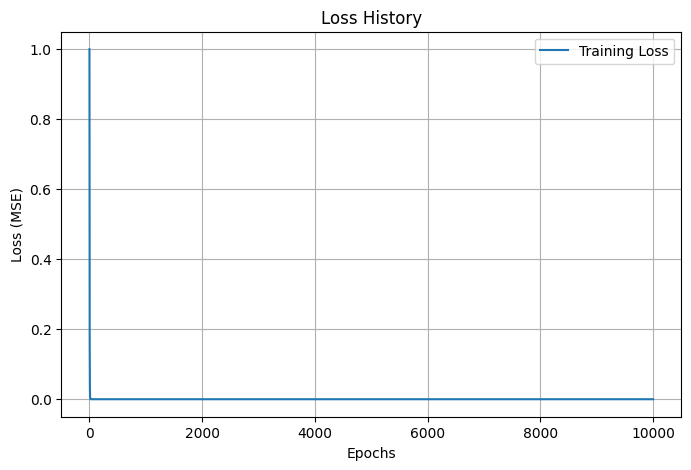

In [49]:
model.plot_loss()